# Descriptive Statistics Super Store

In [78]:
import pandas as pd
%matplotlib inline

df = pd.read_csv('SuperStore_Orders.csv', encoding='ISO-8859-1', sep=',')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [76]:
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")

In [72]:
num_cols = ["sales", "quantity", "discount", "profit", "shipping_cost"]

summary = {}

for col in num_cols:
    summary[col] = {
        "count": df[col].count(),
        "mean": df[col].mean(),
        "std": df[col].std(),
        "min": df[col].min(),
        "25%": df[col].quantile(0.25),
        "50%": df[col].median(),
        "75%": df[col].quantile(0.75),
        "max": df[col].max(),
        "sum": df[col].sum()
    }

summary_df = pd.DataFrame(summary)
print(summary_df)

              sales       quantity      discount        profit  shipping_cost
count  4.866000e+04   51290.000000  51290.000000  5.129000e+04   5.129000e+04
mean   1.610178e+02       3.476545      0.142908  2.864174e+01   2.637592e+01
std    2.010925e+02       2.278766      0.212280  1.744241e+02   5.729680e+01
min    0.000000e+00       1.000000      0.000000 -6.599978e+03   0.000000e+00
25%    2.900000e+01       2.000000      0.000000  0.000000e+00   2.610000e+00
50%    7.700000e+01       3.000000      0.000000  9.240000e+00   7.790000e+00
75%    2.080000e+02       5.000000      0.200000  3.681000e+01   2.445000e+01
max    9.990000e+02      14.000000      0.850000  8.399976e+03   9.335700e+02
sum    7.835128e+06  178312.000000   7329.728000  1.469035e+06   1.352821e+06


In [87]:
# Total profit per kategori
profit_by_category = df.groupby("category")["profit"].sum().reset_index()

# Urutkan dari profit tertinggi
profit_by_category = profit_by_category.sort_values(by="profit", ascending=False)
print(profit_by_category)


          category        profit
2       Technology  663778.73318
1  Office Supplies  518473.83430
0        Furniture  286782.25380


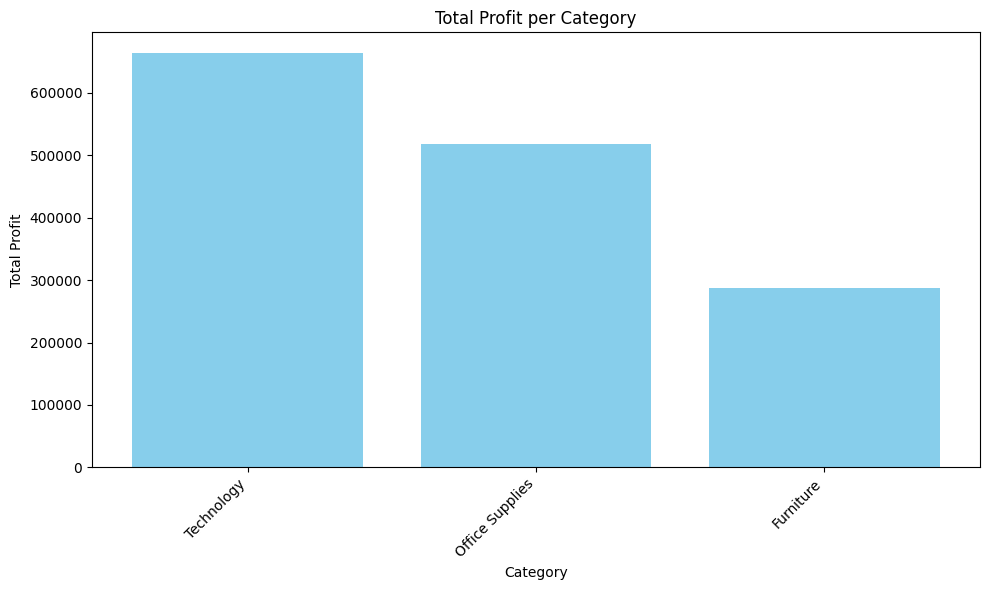

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(profit_by_category["category"], profit_by_category["profit"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Total Profit per Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


In [79]:
category_profit_above_mean = df.groupby("category")["profit"].sum().reset_index()
# Hitung rata-rata profit per kategori
category_profit_mean = df.groupby("category")["profit"].mean().reset_index()

# Urutkan dari yang tertinggi
category_profit_mean = category_profit_mean.sort_values(by="profit", ascending=False)

In [92]:
category_avg_profit = category_profit_mean.head(10)
print(category_avg_profit)


          category     profit
2       Technology  65.454958
0        Furniture  29.038300
1  Office Supplies  16.578961


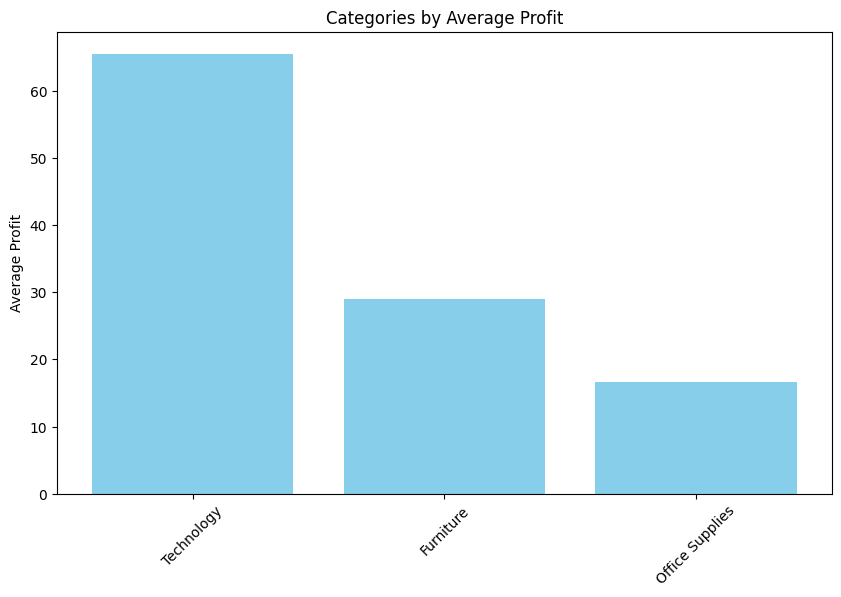

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(category_avg_profit["category"], category_avg_profit["profit"], color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Average Profit")
plt.title("Categories by Average Profit")
plt.show()


In [51]:
# 1. Hitung profit per produk
df_product_profit = df.groupby("product_name")["profit"].sum().reset_index()

# 2. Hitung rata-rata profit
mean_profit = df_product_profit["profit"].mean()

# 3. Filter produk dengan profit di atas mean
above_mean_df = df_product_profit[df_product_profit["profit"] > mean_profit].sort_values(by="profit", ascending=False)

above_mean_df.head(10)  # tampilkan 10 produk teratas


,product_name,profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


In [52]:
above_mean_df = above_mean_df.reset_index(drop=True)


In [54]:
above_mean_df.head(10) 

,product_name,profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,"Cisco Smart Phone, Full Size",17238.5206
2,"Motorola Smart Phone, Full Size",17027.1130
3,"Hoover Stove, Red",11807.9690
4,"Sauder Classic Bookcase, Traditional",10672.0730
5,"Harbour Creations Executive Leather Armchair, ...",10427.3260
6,"Nokia Smart Phone, Full Size",9938.1955
7,"Cisco Smart Phone, with Caller ID",9786.6408
8,"Nokia Smart Phone, with Caller ID",9465.3257
9,"Belkin Router, USB",8955.0180


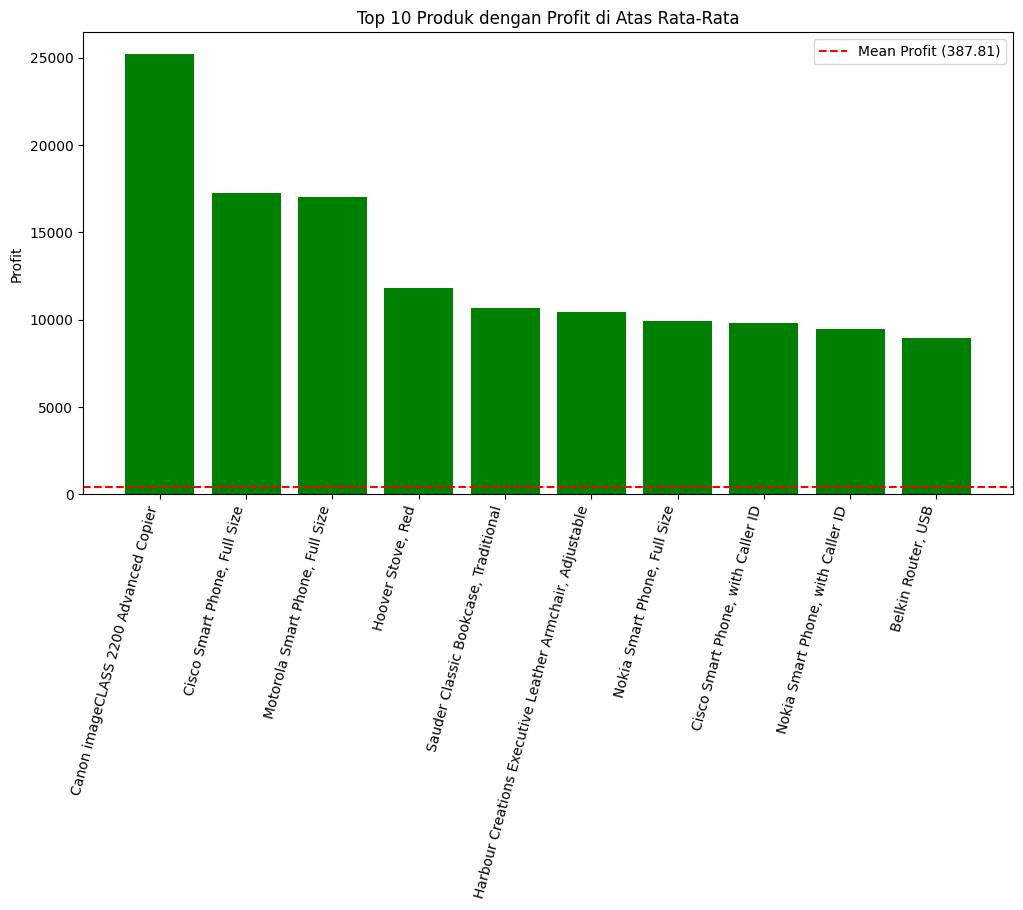

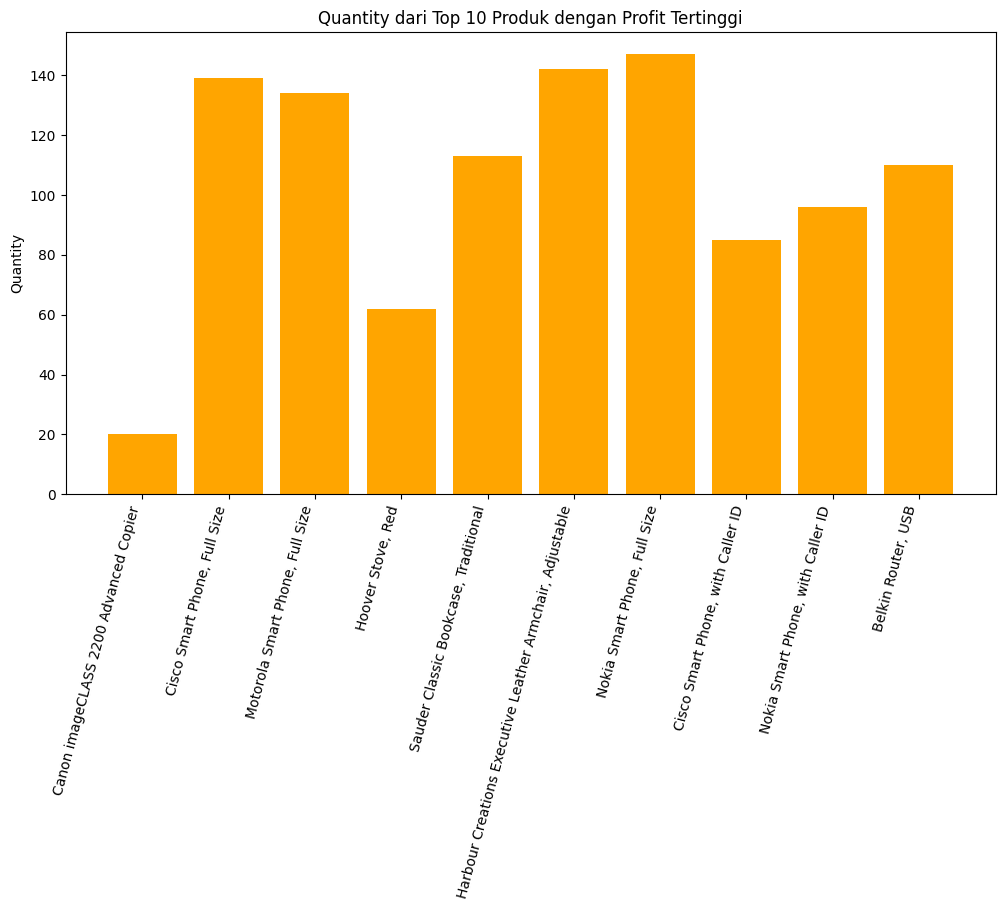

In [66]:
import matplotlib.pyplot as plt

# === Grafik 1: Top 10 produk dengan profit di atas mean ===
top_above_mean = above_mean_df.nlargest(10, "profit")

plt.figure(figsize=(12,6))
plt.bar(top_above_mean["product_name"], top_above_mean["profit"], color="green")
plt.axhline(mean_profit, color="red", linestyle="--", label=f"Mean Profit ({mean_profit:.2f})")

plt.title("Top 10 Produk dengan Profit di Atas Rata-Rata")
plt.ylabel("Profit")
plt.xticks(rotation=75, ha="right")
plt.legend()
plt.show()


# === Grafik 2: Quantity dari produk-produk tersebut ===
# 1. Gabungkan profit dengan quantity
prod_qty_profit = df.groupby("product_name").agg({
    "profit": "sum",
    "quantity": "sum"
}).reset_index()

# 2. Filter produk yang ada di above_mean_df
top_profit_qty = prod_qty_profit[prod_qty_profit["product_name"].isin(above_mean_df["product_name"])]

# 3. Ambil top 10 berdasarkan profit
top_profit_qty = top_profit_qty.sort_values(by="profit", ascending=False).head(10)

# 4. Visualisasi Quantity
plt.figure(figsize=(12,6))
plt.bar(top_profit_qty["product_name"], top_profit_qty["quantity"], color="orange")

plt.title("Quantity dari Top 10 Produk dengan Profit Tertinggi")
plt.ylabel("Quantity")
plt.xticks(rotation=75, ha="right")
plt.show()


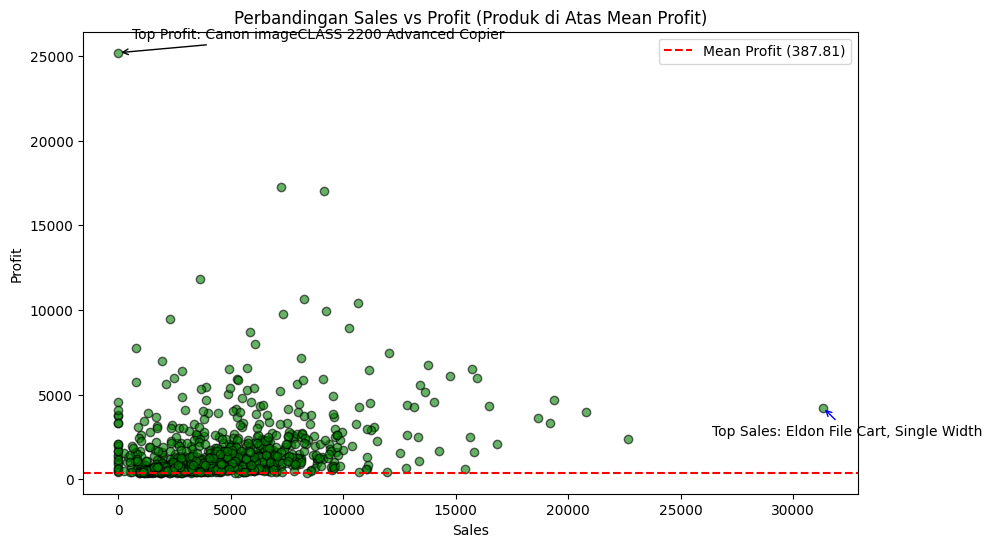

In [61]:
# Cari produk dengan profit tertinggi
top_profit = above_mean_df.loc[above_mean_df["profit"].idxmax()]

# Cari produk dengan sales tertinggi
top_sales = above_mean_df.loc[above_mean_df["sales"].idxmax()]

plt.figure(figsize=(10,6))
plt.scatter(
    above_mean_df["sales"], 
    above_mean_df["profit"], 
    color="green", alpha=0.6, edgecolor="k"
)

# Tambahkan garis rata-rata profit
plt.axhline(mean_profit, color="red", linestyle="--", label=f"Mean Profit ({mean_profit:.2f})")

# Anotasi produk dengan profit tertinggi
plt.annotate(
    f"Top Profit: {top_profit['product_name']}", 
    (top_profit["sales"], top_profit["profit"]), 
    xytext=(10,10), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="black")
)

# Anotasi produk dengan sales tertinggi
plt.annotate(
    f"Top Sales: {top_sales['product_name']}", 
    (top_sales["sales"], top_sales["profit"]), 
    xytext=(-80,-20), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="blue")
)

plt.title("Perbandingan Sales vs Profit (Produk di Atas Mean Profit)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()
plt.show()


In [25]:
# Pastikan kolom profit_quantile jadi kategori terurut
product_profit["profit_quantile"] = pd.Categorical(
    product_profit["profit_quantile"],
    categories=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"],
    ordered=True
)

# Urutkan berdasarkan kuantil (dan bisa juga berdasarkan profit dalam kuantil)
product_profit_sorted = product_profit.sort_values(
    by=["profit_quantile", "profit"], 
    ascending=[True, True]
).reset_index(drop=True)

print(product_profit_sorted)


                                   product_name      profit profit_quantile
0     Cubify CubeX 3D Printer Double Head Print  -8879.9704     Q1 (Lowest)
1     Lexmark MX611dhe Monochrome Laser Printer  -4589.9730     Q1 (Lowest)
2                Motorola Smart Phone, Cordless  -4447.0380     Q1 (Lowest)
3     Cubify CubeX 3D Printer Triple Head Print  -3839.9904     Q1 (Lowest)
4          Bevis Round Table, Adjustable Height  -3649.8940     Q1 (Lowest)
...                                         ...         ...             ...
3783       Sauder Classic Bookcase, Traditional  10672.0730    Q4 (Highest)
3784                          Hoover Stove, Red  11807.9690    Q4 (Highest)
3785            Motorola Smart Phone, Full Size  17027.1130    Q4 (Highest)
3786               Cisco Smart Phone, Full Size  17238.5206    Q4 (Highest)
3787      Canon imageCLASS 2200 Advanced Copier  25199.9280    Q4 (Highest)

[3788 rows x 3 columns]


In [28]:
# Q1: 5 produk dengan profit terendah
q1_bottom5 = product_profit_sorted[product_profit_sorted["profit_quantile"] == "Q1 (Lowest)"].nsmallest(5, "profit")

# Q2: 5 produk dengan profit tertinggi
q2_top5 = product_profit_sorted[product_profit_sorted["profit_quantile"] == "Q2"].nlargest(5, "profit")

# Q3: 5 produk dengan profit tertinggi
q3_top5 = product_profit_sorted[product_profit_sorted["profit_quantile"] == "Q3"].nlargest(5, "profit")

# Q4: 5 produk dengan profit tertinggi
q4_top5 = product_profit_sorted[product_profit_sorted["profit_quantile"] == "Q4 (Highest)"].nlargest(5, "profit")

# Gabungkan jadi 1 dataframe
selected_products = pd.concat([q1_bottom5, q2_top5, q3_top5, q4_top5]).reset_index(drop=True)

print(selected_products)


                                 product_name      profit profit_quantile
0   Cubify CubeX 3D Printer Double Head Print  -8879.9704     Q1 (Lowest)
1   Lexmark MX611dhe Monochrome Laser Printer  -4589.9730     Q1 (Lowest)
2              Motorola Smart Phone, Cordless  -4447.0380     Q1 (Lowest)
3   Cubify CubeX 3D Printer Triple Head Print  -3839.9904     Q1 (Lowest)
4        Bevis Round Table, Adjustable Height  -3649.8940     Q1 (Lowest)
5            Nokia Office Telephone, Cordless     96.9440              Q2
6                                   Xerox 216     96.9408              Q2
7                    Konica Calculator, White     96.7764              Q2
8                  Stiletto Ruler, High Speed     96.6660              Q2
9                     Advantus Clock, Durable     96.5960              Q2
10                     Eldon Door Stop, Black    419.4932              Q3
11            Fellowes High-Stak Drawer Files    419.3322              Q3
12                SanDisk Keyboard, Bl

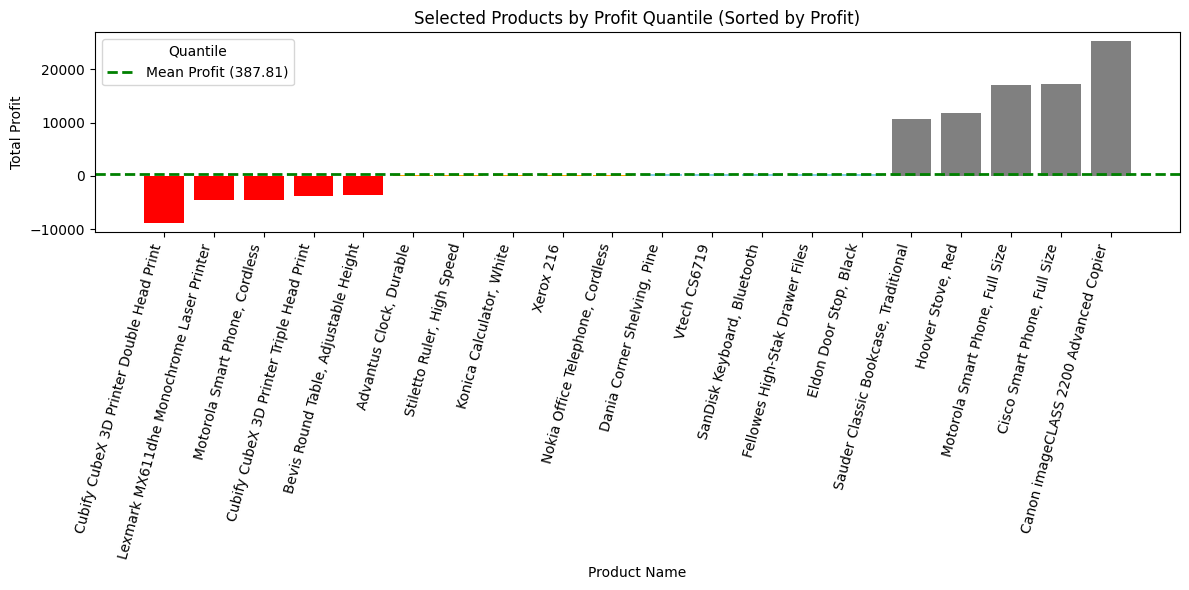

In [33]:
# Urutkan berdasarkan profit ascending
selected_sorted = selected_products.sort_values(by="profit", ascending=True)

# Mapping warna lagi
colors = selected_sorted["profit_quantile"].map(color_map).fillna("gray")

# Plot ulang
plt.figure(figsize=(12,6))
plt.bar(
    selected_sorted["product_name"], 
    selected_sorted["profit"], 
    color=colors
)

# Garis mean profit
plt.axhline(mean_profit, color="green", linestyle="--", linewidth=2, label=f"Mean Profit ({mean_profit:.2f})")

# Label
plt.title("Selected Products by Profit Quantile (Sorted by Profit)")
plt.ylabel("Total Profit")
plt.xlabel("Product Name")
plt.xticks(rotation=75, ha="right")
plt.legend(title="Quantile")
plt.tight_layout()
plt.show()


In [35]:
# Hitung mean profit
mean_profit = df["profit"].mean()

# Buat kolom quantile profit (pakai 3 kuantil, misal)
df["profit_quantile"] = pd.qcut(df["profit"], q=3, labels=["Q1", "Q2", "Q3"])

# Filter produk dengan profit di bawah rata-rata
below_mean_df = df[df["profit"] < mean_profit][["product_name", "profit", "profit_quantile"]]

# Urutkan biar rapi (opsional, dari yang paling rugi ke yang mendekati mean)
below_mean_df = below_mean_df.sort_values(by="profit", ascending=True)

# Lihat hasilnya
below_mean_df


,product_name,profit,profit_quantile
31884,Cubify CubeX 3D Printer Double Head Print,-6599.9780,Q1
29212,"Motorola Smart Phone, Cordless",-4088.3760,Q1
47195,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,Q1
3775,GBC DocuBind P400 Electric Binding System,-3701.8928,Q1
37130,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800,Q1
...,...,...,...
4631,"Stiletto Trimmer, Steel",28.6200,Q3
38248,"Stiletto Trimmer, Steel",28.6200,Q3
8628,"Eldon Light Bulb, Durable",28.6200,Q3
38664,Fellowes Stor/Drawer Steel Plus Storage Drawers,28.6290,Q3


C:\Users\72531\AppData\Local\Temp\ipykernel_29760\1052621252.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(wrap_labels(top_q1["product_name"]), rotation=45, ha="right")
C:\Users\72531\AppData\Local\Temp\ipykernel_29760\1052621252.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(wrap_labels(top_q3["product_name"]), rotation=45, ha="right")


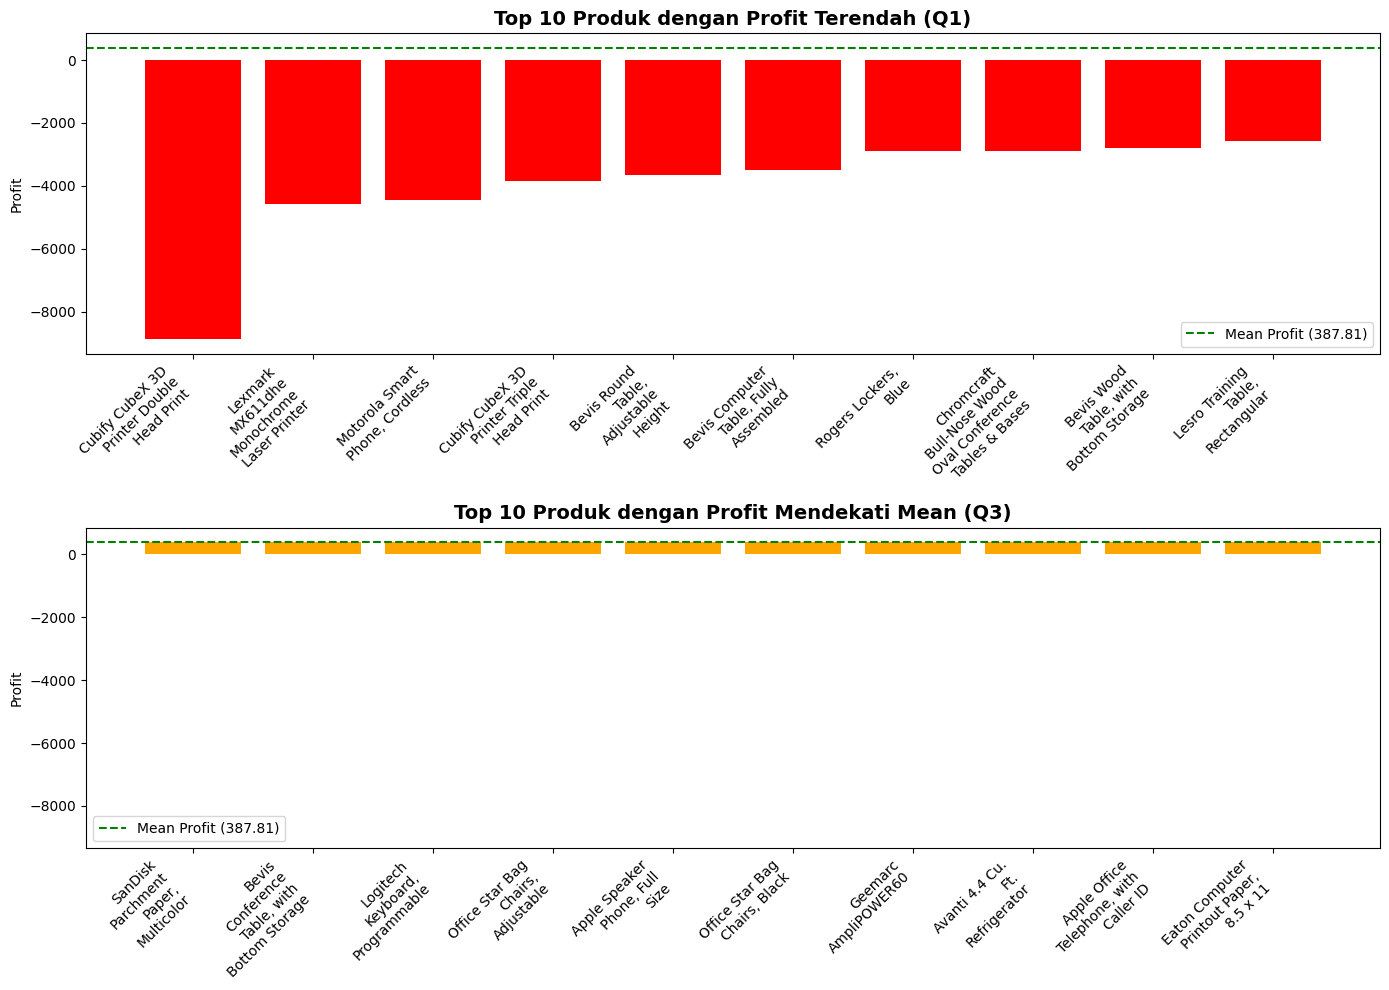

In [47]:
import matplotlib.pyplot as plt
import textwrap

# Fungsi untuk memotong teks panjang biar lebih rapi
def wrap_labels(labels, width=15):
    return ['\n'.join(textwrap.wrap(l, width)) for l in labels]

# --- Plot dua grafik dalam satu cell ---
fig, axes = plt.subplots(2, 1, figsize=(14,10), sharey=True)

# Grafik Q1 (Produk Terendah)
axes[0].bar(top_q1["product_name"], top_q1["profit"], color="red")
axes[0].axhline(mean_profit, color="green", linestyle="--", label=f"Mean Profit ({mean_profit:.2f})")
axes[0].set_title("Top 10 Produk dengan Profit Terendah (Q1)", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Profit")
axes[0].set_xticklabels(wrap_labels(top_q1["product_name"]), rotation=45, ha="right")
axes[0].legend()

# Grafik Q3 (Produk Mendekati Mean)
axes[1].bar(top_q3["product_name"], top_q3["profit"], color="orange")
axes[1].axhline(mean_profit, color="green", linestyle="--", label=f"Mean Profit ({mean_profit:.2f})")
axes[1].set_title("Top 10 Produk dengan Profit Mendekati Mean (Q3)", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Profit")
axes[1].set_xticklabels(wrap_labels(top_q3["product_name"]), rotation=45, ha="right")
axes[1].legend()

plt.tight_layout()
plt.show()


In [49]:
df_quantile = df.groupby("product_name")["profit"].sum().reset_index()


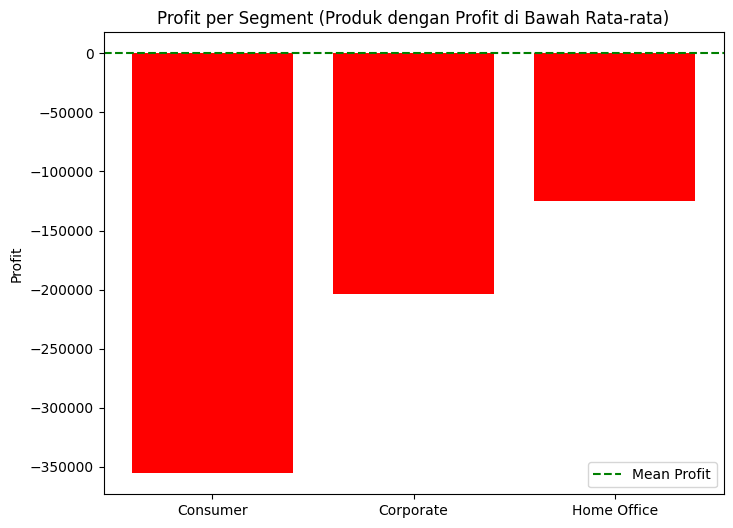

In [50]:
# Filter produk dengan profit di bawah rata-rata
below_mean_df = df[df["profit"] < df["profit"].mean()]

# Hitung profit per segment dari produk2 yang rugi
seg_profit_below = below_mean_df.groupby("segment")["profit"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(seg_profit_below["segment"], seg_profit_below["profit"], color="red")
plt.axhline(df["profit"].mean(), color="green", linestyle="--", label="Mean Profit")
plt.title("Profit per Segment (Produk dengan Profit di Bawah Rata-rata)")
plt.ylabel("Profit")
plt.legend()
plt.show()


In [22]:
# Hitung total profit per produk
product_profit = df.groupby("product_name")["profit"].sum().reset_index()

# Tambahkan kolom kuantil
product_profit["profit_quantile"] = pd.qcut(product_profit["profit"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

print(product_profit.head())


                                        product_name    profit profit_quantile
0  "While you Were Out" Message Book, One Form pe...   10.3880              Q1
1           #10 Gummed Flap White Envelopes, 100/Box   16.7678              Q2
2                      #10 Self-Seal White Envelopes   52.1230              Q2
3         #10 White Business Envelopes,4 1/8 x 9 1/2  223.1408              Q3
4            #10- 4 1/8" x 9 1/2" Recycled Envelopes  115.2806              Q3


In [20]:
import pandas as pd

# 1. Filter kategori furniture
furniture_df = df[df["category"] == "Furniture"]

# 2. Hitung metrik per produk
product_summary = furniture_df.groupby("product_name").agg({
    "sales": "sum",
    "profit": "sum",
    "quantity": "sum",
    "discount": "mean"
}).reset_index()

# 3. Hitung quantile untuk sales
q25 = product_summary["sales"].quantile(0.25)
q75 = product_summary["sales"].quantile(0.75)

# 4. Tambahkan kolom segmentasi
def classify_product(x):
    if x > q75:
        return "Unggulan"
    elif x < q25:
        return "Fokus Penetrasi"
    else:
        return "Stabil"

product_summary["segmentasi"] = product_summary["sales"].apply(classify_product)

# 5. Simpan ke dataframe final
furniture_analysis = product_summary.sort_values(by="sales", ascending=False)

# 6. Tampilkan seluruh hasil (bukan cuma head)
print(furniture_analysis)

# Kalau mau simpan ke file Excel/CSV:
# furniture_analysis.to_csv("furniture_analysis.csv", index=False)


                                          product_name    sales     profit  \
646  Office Star Executive Leather Armchair, Adjust...  19355.0  4710.9840   
455         Hon Executive Leather Armchair, Adjustable  15927.0  5997.2541   
142                      Bush Stackable Bookrack, Pine  15632.0  2480.2080   
416                Harbour Creations Swivel Stool, Red  15419.0   610.4856   
484                            Hon Swivel Stool, Black  13611.0  5186.1696   
..                                                 ...      ...        ...   
50          Barricks Coffee Table, with Bottom Storage      0.0   379.8200   
62           Barricks Round Table, with Bottom Storage      0.0 -1715.3325   
61                   Barricks Round Table, Rectangular      0.0  -623.9400   
165       Chromcraft Conference Table, Fully Assembled      0.0   996.4080   
162             Chromcraft Computer Table, Rectangular      0.0   405.7200   

     quantity  discount       segmentasi  
646       141  0.143

In [12]:
# Cell 3 - health checks
print("Jumlah baris:", len(df))
print("Kolom numerik:", num_cols)
print("\nUnique counts (kategori):")
cat_cols = ["ship_mode","segment","state","country","market","region","category","sub_category","order_priority"]
for c in cat_cols:
    if c in df.columns:
        print(f" - {c}: {df[c].nunique()} unik, top 5 =\n{df[c].value_counts().head()}\n")


Jumlah baris: 51290
Kolom numerik: ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

Unique counts (kategori):
 - ship_mode: 4 unik, top 5 =
ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

 - segment: 3 unik, top 5 =
segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

 - state: 1094 unik, top 5 =
state
California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
Name: count, dtype: int64

 - country: 147 unik, top 5 =
country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
Name: count, dtype: int64

 - market: 7 unik, top 5 =
market
APAC     11002
LATAM    10294
EU       10000
US        9994
EMEA      5029
Name: count, dtype: int64

 - region: 13 unik, top 5 =
region
Central    11117
South       6645
EMEA        5029
North       4785
Af

In [15]:
# Cell 4 - Central tendency
central = {}
for c in num_cols:
    s = df[c].dropna()
    modes = s.mode().tolist()            # bisa 0..n mode
    central[c] = {
        "count": int(s.count()),
        "sum": float(s.sum()) if s.size>0 else np.nan,
        "mean": float(s.mean()) if s.size>0 else np.nan,
        "median": float(s.median()) if s.size>0 else np.nan,
        "modes": modes
    }

central_df = pd.DataFrame(central).T
central_df


,count,sum,mean,median,modes
sales,48660,7835128.0,161.017838,77.0,[13.0]
quantity,51290,178312.0,3.476545,3.0,[2]
discount,51290,7329.728,0.142908,0.0,[0.0]
profit,51290,1469034.82128,28.64174,9.24,[0.0]
shipping_cost,51290,1352820.69,26.375915,7.79,[0.86]


In [16]:
# Cell 5 - Dispersion
from math import isnan

disp = {}
for c in num_cols:
    s = df[c].dropna()
    if s.empty:
        disp[c] = {k: np.nan for k in ["std","var","min","q1","q3","iqr","max","range","cv","skew","kurtosis"]}
        continue
    std = float(s.std(ddof=1))       # sample std
    var = float(s.var(ddof=1))       # sample variance
    mn = float(s.min())
    q1 = float(s.quantile(0.25))
    q3 = float(s.quantile(0.75))
    iqr = q3 - q1
    mx = float(s.max())
    rng = mx - mn
    mean = float(s.mean()) if not isnan(float(s.mean())) else np.nan
    cv = std/mean if mean not in (0,np.nan) else np.nan
    skew = float(s.skew())
    kurt = float(s.kurtosis())
    disp[c] = {"std":std, "var":var, "min":mn, "q1":q1, "q3":q3, "iqr":iqr, "max":mx, "range":rng, "cv":cv, "skew":skew, "kurtosis":kurt}

disp_df = pd.DataFrame(disp).T
disp_df


,std,var,min,q1,q3,iqr,max,range,cv,skew,kurtosis
sales,201.092519,40438.201001,0.000,29.00,208.00,179.00,999.000,999.000,1.248883,1.953358,3.472438
quantity,2.278766,5.192776,1.000,2.00,5.00,3.00,14.000,13.000,0.655469,1.360368,2.275889
discount,0.212280,0.045063,0.000,0.00,0.20,0.20,0.850,0.850,1.485435,1.387775,0.716682
profit,174.424113,30423.771190,-6599.978,0.00,36.81,36.81,8399.976,14999.954,6.089858,4.158188,290.900131
shipping_cost,57.296804,3282.923736,0.000,2.61,24.45,21.84,933.570,933.570,2.172315,5.863226,50.020158


In [19]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,48660.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,161.017838,3.476545,0.142908,28.641740,26.375915,2012.777208
std,201.092519,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,29.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,77.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,208.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000
